# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [6]:
!pip install palmerpenguins

import pandas as pd

from palmerpenguins import load_penguins

penguins = load_penguins()

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


If we are trying to predict bill_depth_mm, we want to dumify the categorical variables such as species, island and sex.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [7]:
penguins["l2"] = penguins['bill_length_mm']**2
penguins["l3"] = penguins['bill_length_mm']**3
penguins["l4"] = penguins['bill_length_mm']**4
penguins["l5"] = penguins['bill_length_mm']**5
penguins["l6"] = penguins['bill_length_mm']**6
penguins["l7"] = penguins['bill_length_mm']**7
penguins["l8"] = penguins['bill_length_mm']**8
penguins["l9"] = penguins['bill_length_mm']**9
penguins["l10"] = penguins['bill_length_mm']**10

penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,l2,l3,l4,l5,l6,l7,l8,l9,l10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15


In [30]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Y1 = penguins["bill_depth_mm"].dropna()

X1 = penguins[["bill_length_mm"]].dropna()
X2 = penguins[["bill_length_mm", "l2"]].dropna()
X3 = penguins[["bill_length_mm", "l2", "l3"]].dropna()
X10 = penguins[["bill_length_mm", "l2", "l3", "l4", "l5", "l6", "l7", "l8", "l9", "l10"]].dropna()


lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()
lr10 = LinearRegression()

lr1 = lr1.fit(X1, Y1)
lr2 = lr2.fit(X2, Y1)
lr3 = lr3.fit(X3, Y1)
lr10 = lr10.fit(X10, Y1)

y_pred_lr1 = lr1.predict(X1)
y_pred_lr2 = lr2.predict(X2)
y_pred_lr3 = lr3.predict(X3)
y_pred_lr10 = lr10.predict(X10)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


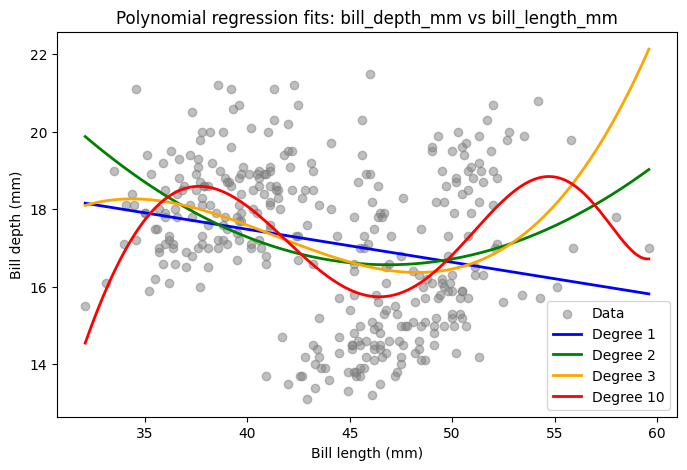

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Drop NAs so X and y align
df = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()
X = df[['bill_length_mm']]
y = df['bill_depth_mm']

# Helper to fit polynomial models
def fit_poly(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    return model, poly

# Fit models
models = {}
for d in [1, 2, 3, 10]:
    models[d] = fit_poly(d)

# Create smooth x-range for plotting
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Scatterplot of data
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')

# Plot each fitted curve
colors = {1:'blue', 2:'green', 3:'orange', 10:'red'}
for d, (model, poly) in models.items():
    y_pred = model.predict(poly.transform(x_range))
    plt.plot(x_range, y_pred, color=colors[d], lw=2, label=f'Degree {d}')

plt.xlabel("Bill length (mm)")
plt.ylabel("Bill depth (mm)")
plt.title("Polynomial regression fits: bill_depth_mm vs bill_length_mm")
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error

print("deg1:", mean_squared_error(Y1, y_pred_lr1))
print("deg2:", mean_squared_error(Y1, y_pred_lr2))
print("deg3:", mean_squared_error(Y1, y_pred_lr3))
print("deg10:", mean_squared_error(Y1, y_pred_lr10))

deg1: 3.6735712609948115
deg2: 3.44680413425429
deg3: 3.3343549669650603
deg10: 2.8184892910760775


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?